Попробуем построить пайплайн для обработки снимков позвоночника
* вычитать данные
* обработать каждый из снимков
* сгененрировать обработанный набор снимков
* вывести точки

In [114]:
import os
import matplotlib.pyplot as plt
from base_function import mendeley_scrap_data

BASE_PATH = '..\\..\\test-data'

In [115]:
first_patient_root_path = f'{BASE_PATH}\\0001\\L-SPINE_LSS_20160309_091629_240000'
dirs = os.listdir(first_patient_root_path)

os.listdir(f'{first_patient_root_path}\\{dirs[0]}')

parsed_fp = mendeley_scrap_data(first_patient_root_path)

In [116]:
t1_sag = parsed_fp['data'][2]['image_sequence']
image_seq = [x['binary_data'] for x in t1_sag]

Получены "стуктурки" с нужными последовательностями изображение  
ДА НАЧНЕТСЯ COMPUTER VISION eHehe

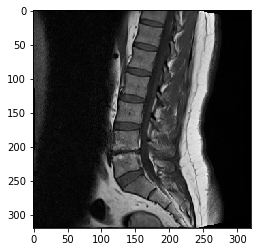

In [117]:
plt.imshow(image_seq[6], cmap='gray')

In [118]:
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square
image_6 = image_seq[6]
threshold = threshold_otsu(image_6)

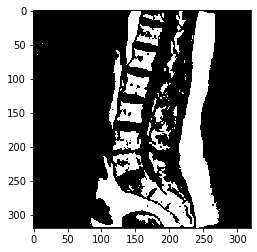

In [119]:
bw = closing(image_6 > threshold, square(2))
plt.imshow(bw, cmap='gray')

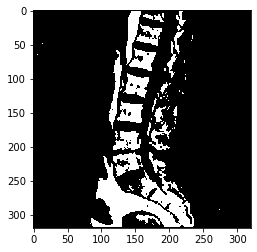

In [120]:
# Убираем 
from skimage.segmentation import clear_border
# потенциально можно использовать маску
cleared = clear_border(bw)
plt.imshow(cleared, cmap='gray')

# NB: убран жир почему-то

In [121]:
from skimage.measure import label, regionprops
from skimage.color import label2rgb

labeled_image = label(cleared)
image_label_overlay = label2rgb(labeled_image, image=image_6)

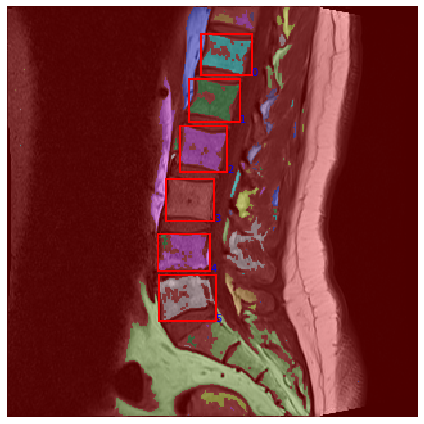

In [122]:
import matplotlib.patches as mpatches 

fig, ax = plt.subplots(figsize=(10, 6))

ax.imshow(image_label_overlay)
i = 0

survived_regions = []

for region in regionprops(labeled_image):
    # print(region)
    if 550 <= region.area <= 800:
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        
        ax.add_patch(rect)
        ax.text(maxc, maxr, str(i), color='blue')
        i += 1
        survived_regions.append(region)
    
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [123]:
regions = regionprops(labeled_image)

In [124]:
[x.area for x in survived_regions]


[585, 695, 778, 800, 742, 772]

В наскок не получилось